In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df =pd.read_csv('calories.csv')

In [3]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<Axes: >

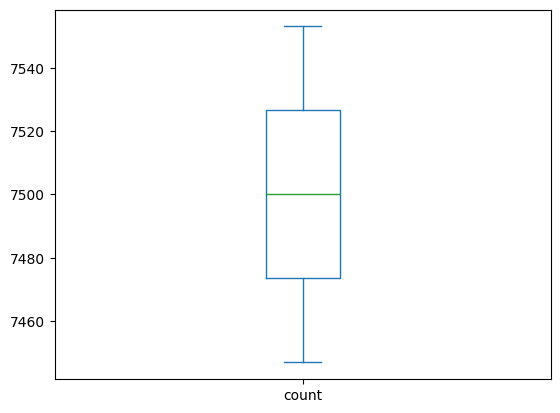

In [6]:
df['Gender'].value_counts().plot(kind='box')

In [7]:
df['Age'].describe()

count    15000.000000
mean        42.789800
std         16.980264
min         20.000000
25%         28.000000
50%         39.000000
75%         56.000000
max         79.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

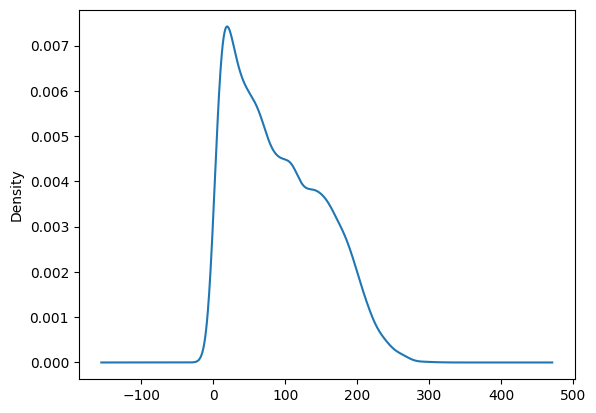

In [8]:
df['Calories'].plot(kind='kde')

In [9]:
df.drop(columns=['User_ID'],inplace=True)

In [10]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [11]:
def extract_data(file_path):
    """Extract data from a CSV file."""
    return pd.read_csv(file_path)

def transform_data(df):
    """Transform the data: handle missing values, scale numerical features, and encode categorical variables."""
    
    # Identify numeric and categorical columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['object']).columns
    
    # Pipelines for preprocessing
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    
    transformed_data = preprocessor.fit_transform(df)
    feature_names = list(numeric_features) + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features))
    return pd.DataFrame(transformed_data, columns=feature_names)

def load_data(df, output_path):
    """Load the transformed data into a new CSV file."""
    df.to_csv(output_path, index=False)

def etl_pipeline(input_path, output_path):
    """Complete ETL pipeline function."""
    print("Extracting data...")
    df = extract_data(input_path)
    
    print("Transforming data...")
    transformed_df = transform_data(df)
    
    print("Loading data...")
    load_data(transformed_df, output_path)
    
    print("ETL Pipeline completed successfully!")

# Example usage
# etl_pipeline('input_data.csv', 'processed_data.csv')


In [12]:
etl_pipeline('calories.csv','processed_calories.csv')

Extracting data...
Transforming data...
Loading data...
ETL Pipeline completed successfully!


In [13]:
pd.read_csv('processed_calories.csv')

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,-0.084934,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002,0.0,1.0
1,-0.040261,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905,1.0,0.0
2,-1.321900,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367,0.0,1.0
3,0.418779,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847,1.0,0.0
4,0.972783,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14995,0.232085,-1.342179,1.299996,0.733822,-0.544614,-0.367164,0.480679,-0.713147,1.0,0.0
14996,0.778075,-0.929922,-0.663864,-0.662904,-1.145653,-1.097623,-1.059355,-1.065401,1.0,0.0
14997,0.798477,0.012379,-1.084691,-1.128480,0.056426,-0.575866,0.095670,-0.232801,1.0,0.0
14998,1.276015,2.073665,1.299996,1.465441,-1.626484,-1.201975,-2.214380,-1.257540,0.0,1.0


In [14]:
transform_data(df)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002,0.0,1.0
1,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905,1.0,0.0
2,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367,0.0,1.0
3,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847,1.0,0.0
4,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263,1.0,0.0
...,...,...,...,...,...,...,...,...,...
14995,-1.342179,1.299996,0.733822,-0.544614,-0.367164,0.480679,-0.713147,1.0,0.0
14996,-0.929922,-0.663864,-0.662904,-1.145653,-1.097623,-1.059355,-1.065401,1.0,0.0
14997,0.012379,-1.084691,-1.128480,0.056426,-0.575866,0.095670,-0.232801,1.0,0.0
14998,2.073665,1.299996,1.465441,-1.626484,-1.201975,-2.214380,-1.257540,0.0,1.0
